#**Project Name - Feathers & Forests: Analysis on Bird Diversity Across Forests & Grasslands**

Project type - Exploratory Data Analysis (EDA) and Visualization

Contribution - Individual(SANJEEV RAJ T)

# **Project Summary**

This project focuses on analyzing bird species observation data collected across two distinct ecosystems — forests and grasslands. By exploring 17,000+ records from multiple administrative sites, the project aims to uncover temporal, spatial, behavioral, and environmental patterns in avian diversity.

Key objectives include identifying biodiversity hotspots, understanding habitat-specific species richness, and evaluating the effects of environmental factors such as temperature, humidity, and disturbances on bird activity. The analysis also places emphasis on observer patterns and conservation priorities like species listed on the PIF Watchlist and those under regional stewardship.

The project follows a structured pipeline:
1. Data Preprocessing: Cleaning, formatting, and consolidating multi-sheet Excel data.
2.  Exploratory Data Analysis (EDA): Uncovering trends in species, locations, and observation timing.
3.  Visualization: Designing interactive dashboards using Power BI for stakeholder-friendly insights.

This analysis provides valuable inputs for ecological conservation planning, eco-tourism strategies, and sustainable land management practices, blending environmental science with data analytics for real-world impact.

# **GitHub Link** - https://github.com/SanjeevFOfin/Feathers-Forests-Analysis-on-Bird-Diversity-Across-Forests-Grasslands

# **Problem Statement**

The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands. By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior. The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity. The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.

# **Welcome to Feather Findings in Forests & Grasslands**

# **Data Cleaning and Preprocessing**

In [125]:
# Data Handling
import pandas as pd
import numpy as np

# Date and Time Manipulation
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Visuals (optional, if needed)
import plotly.express as px

# Display settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Statistical analysis
import scipy.stats as stats

**Mixing the Bird Species Together**

In [126]:
import pandas as pd

# Load the Excel files
forest_excel = pd.ExcelFile("Bird_Monitoring_Data_FOREST.XLSX")
grassland_excel = pd.ExcelFile("Bird_Monitoring_Data_GRASSLAND.XLSX")

# Combine all sheets(Concatination) and tag them with Admin Unit + Habitat
forest_data = pd.concat(
    [df.assign(Admin_Unit_Code=sheet, Habitat="Forest")
     for sheet, df in forest_excel.parse(sheet_name=None).items()],
    ignore_index=True
)

grassland_data = pd.concat(
    [df.assign(Admin_Unit_Code=sheet, Habitat="Grassland")
     for sheet, df in grassland_excel.parse(sheet_name=None).items()],
    ignore_index=True
)

# Final combined dataset
GF = pd.concat([forest_data, grassland_data], ignore_index=True)# Grassland Forest - GF(Combined Data)

# Preview
print(f"Total records: {GF.shape[0]}")
GF.head()


Total records: 17077


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Undetermined,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803.0,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,NaN,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935.0,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,NaN,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865.0,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,NaN,Orchard Oriole,Icterus spurius,179064.0,93634.0,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,NaN,Northern Mockingbird,Mimus polyglottos,178620.0,88394.0,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


In [127]:
#Checking the datas imported or combined is correct or not with excel file.
grassland_data['Admin_Unit_Code'].value_counts()


,count
Admin_Unit_Code,
ANTI,3588
MONO,3015
MANA,1811
HAFE,117


In [128]:
#Checking the datas imported or combined is correct or not with excel file.
forest_data['Admin_Unit_Code'].value_counts()

,count
Admin_Unit_Code,
PRWI,2463
CHOH,2202
CATO,805
NACE,684
MANA,465
HAFE,422
GWMP,386
MONO,370
ANTI,333


**🧾 1. Convert Columns to Correct Data Types**

In [129]:
# Convert Date to datetime format
GF['Date'] = pd.to_datetime(GF['Date'], errors='coerce')#

# Convert Start_Time and End_Time to datetime.time format
GF['Start_Time'] = pd.to_datetime(GF['Start_Time'], errors='coerce').dt.time
GF['End_Time'] = pd.to_datetime(GF['End_Time'], errors='coerce').dt.time

# Convert numeric columns to numeric type
numeric_cols = ['Year', 'Visit', 'Initial_Three_Min_Cnt', 'Temperature', 'Humidity']
for col in numeric_cols:
    GF[col] = pd.to_numeric(GF[col], errors='coerce')

# Convert boolean-like columns to actual boolean
bool_cols = ['Flyover_Observed', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status']
for col in bool_cols:
    GF[col] = GF[col].astype(str).str.strip().str.upper().replace({'TRUE': True, 'FALSE': False})
    GF[col] = GF[col].astype(bool)


✅ Converts the Date column to a proper datetime format.
If a date is badly formatted, it's turned into NaT (missing date) because of errors='coerce'.  
✅ Converts Start_Time and End_Time into time objects (like 07:30:00), not full datetime.
Also handles invalid/missing values by turning them into NaT.  
✅ Converts numeric-like columns to actual numbers.
If there’s a string like "N/A" or "Missing", it becomes NaN.
Makes sure we can later plot and calculate stats correctly.  
✅ Ensures TRUE/FALSE text values are converted to Python's actual True/False values.
This makes future filtering and counting easier.

**🧼 2. Trim Whitespace & Clean Text Columns**

In [130]:
text_cols = ['Common_Name', 'Scientific_Name', 'Observer', 'Plot_Name',
             'ID_Method', 'Sex', 'Sky', 'Wind', 'Disturbance']

for col in text_cols:
    GF[col] = GF[col].astype(str).str.strip().str.title()


✅ Cleans up messy text by:
1.   Turning " Male" → "Male"
2.   Making "CLOUDY" → "Cloudy"
3.   Converting "none " → "None"

This avoids treating the same category as different due to small differences

**🛠️ 3. Create New Features**

In [131]:
# Extract Month and Season from Date
GF['Month'] = GF['Date'].dt.month
GF['Season'] = GF['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Observation Duration (in minutes)
def calc_duration(row):
    try:
        start = pd.to_datetime(row['Start_Time'], format='%H:%M:%S')
        end = pd.to_datetime(row['End_Time'], format='%H:%M:%S')
        return (end - start).total_seconds() / 60
    except:
        return None

GF['Observation_Duration_Min'] = GF.apply(calc_duration, axis=1)

# Time bucket from Start_Time
def get_time_bucket(time_val):
    if pd.isnull(time_val):
        return "Unknown"
    hour = time_val.hour
    if hour < 8:
        return "Early Morning"
    elif hour < 12:
        return "Morning"
    elif hour < 17:
        return "Afternoon"
    else:
        return "Evening"

GF['Time_Bucket'] = GF['Start_Time'].apply(get_time_bucket)


✅ Extracts month (1 to 12) from the Date column.

✅ Adds a Season column using the month.
Useful to analyze seasonal trends (e.g., bird activity in winter vs summer).

✅ Calculates how long each observation lasted in minutes.
For example: Start_Time = 07:00, End_Time = 07:10 → 10.0 minutes.
If there's an error (like missing time), it returns None.

✅ Categorizes the time of day into 4 buckets:

Before 8 AM → "Early Morning"

8–11:59 AM → "Morning"

12–4:59 PM → "Afternoon"

5 PM and later → "Evening"

This helps see what time birds are most active.



**📏 4. Clean “Distance” Column**

In [132]:
def clean_distance(value):
    if pd.isnull(value):
        return None
    val = str(value).strip().lower()
    if "<= 50" in val or "50" in val:
        return "0-50m"
    elif "100" in val:
        return "50-100m"
    elif "> 100" in val:
        return ">100m"
    else:
        return "Unknown"

GF['Distance_Cleaned'] = GF['Distance'].apply(clean_distance)


✅ Creates a cleaner version of the Distance column like:


*<= 50 Meters → 0-50m

*50-100 Meters → 50-100m

*> 100 → >100m

This helps in grouping and comparing bird distances later.



**🔁 5. Drop Duplicates**

In [133]:
GF.drop_duplicates(inplace=True)# Removes any identical rows (if they exist).Good hygiene to prevent skewed results.


**🧾 6. Reorder Columns**

In [134]:
cols_to_front = ['Date', 'Month', 'Season', 'Start_Time', 'End_Time', 'Time_Bucket',
                 'Observer', 'Common_Name', 'Scientific_Name', 'Sex',
                 'Distance_Cleaned', 'Flyover_Observed', 'Initial_Three_Min_Cnt',
                 'Temperature', 'Humidity', 'Sky', 'Wind',
                 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
                 'Admin_Unit_Code', 'Habitat']

remaining_cols = [col for col in GF.columns if col not in cols_to_front]
GF = GF[cols_to_front + remaining_cols]# Brings the most useful columns to the front so we can easily see them first when displaying or exporting the data.


# **Feathered Findings: Exploring Bird Diversity Through Data(EDA)**

**Data Shape Overview**

In [135]:
# Dataset rows & columns
print("Shape of dataset:", GF.shape)


Shape of dataset: (15372, 37)


In [136]:
#Fetching all the columns of Dataset
GF.columns

Index(['Date', 'Month', 'Season', 'Start_Time', 'End_Time', 'Time_Bucket',
       'Observer', 'Common_Name', 'Scientific_Name', 'Sex', 'Distance_Cleaned',
       'Flyover_Observed', 'Initial_Three_Min_Cnt', 'Temperature', 'Humidity',
       'Sky', 'Wind', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Admin_Unit_Code', 'Habitat', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Visit', 'Interval_Length', 'ID_Method',
       'Distance', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'Disturbance',
       'TaxonCode', 'Previously_Obs', 'Observation_Duration_Min'],
      dtype='object')

In [137]:
#Dataset Information or Feature Summary
GF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15372 entries, 0 to 17067
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         15372 non-null  datetime64[ns]
 1   Month                        15372 non-null  int32         
 2   Season                       15372 non-null  object        
 3   Start_Time                   0 non-null      datetime64[ns]
 4   End_Time                     0 non-null      datetime64[ns]
 5   Time_Bucket                  15372 non-null  object        
 6   Observer                     15372 non-null  object        
 7   Common_Name                  15372 non-null  object        
 8   Scientific_Name              15372 non-null  object        
 9   Sex                          15372 non-null  object        
 10  Distance_Cleaned             14683 non-null  object        
 11  Flyover_Observed             15372 non-null  b

In [138]:
# Checking for Data Redundancy
print('GF_duplicates:',GF.duplicated().sum())

GF_duplicates: 0


In [139]:
# Holes in the Dataset
print(GF.isnull().sum())


Date                               0
Month                              0
Season                             0
Start_Time                     15372
End_Time                       15372
Time_Bucket                        0
Observer                           0
Common_Name                        0
Scientific_Name                    0
Sex                                0
Distance_Cleaned                 689
Flyover_Observed                   0
Initial_Three_Min_Cnt              0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Admin_Unit_Code                    0
Habitat                            0
Sub_Unit_Code                  14650
Site_Name                       6826
Plot_Name                          0
Location_Type                      0
Year                               0
Visit                              0
I

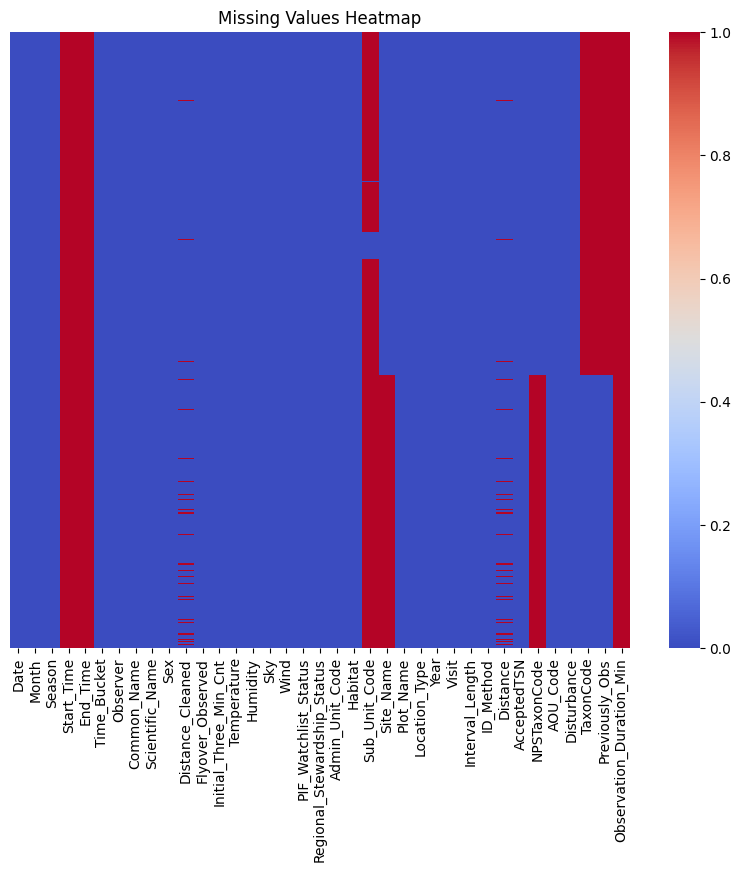

In [140]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(GF.isnull(), cbar=True, cmap='coolwarm', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

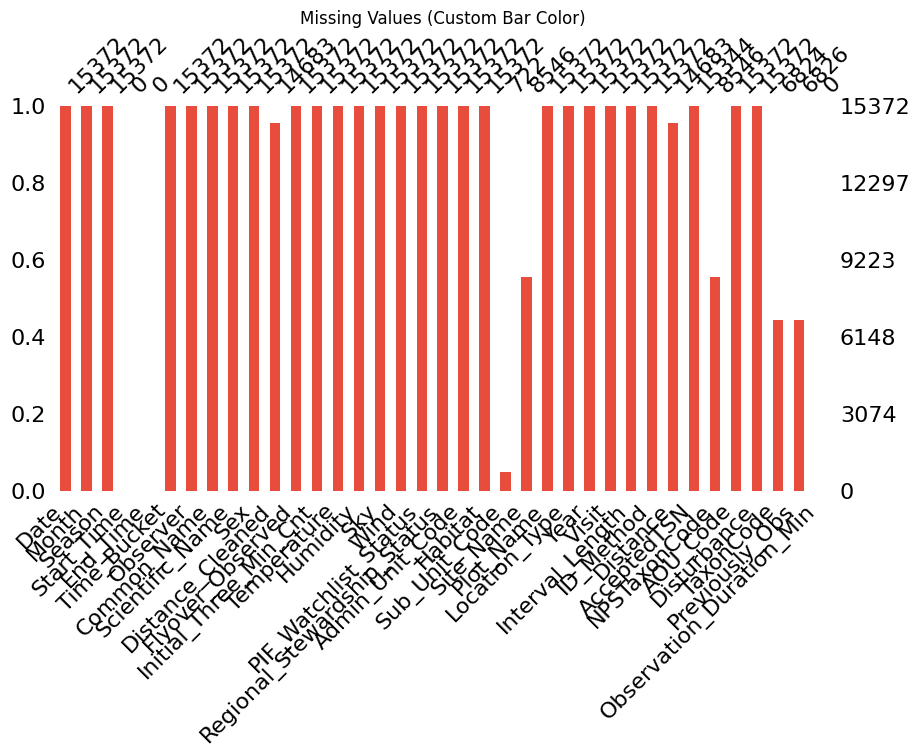

In [141]:
import missingno as msno

# as a bar chart
msno.bar(GF, figsize=(10, 5), color='#e74c3c')
plt.title("Missing Values (Custom Bar Color)")
plt.show()

🔍 Step 1: Check Missing Values Again

In [142]:
# Check how many missing values are present in each column
GF.isnull().sum().sort_values(ascending=False)


,0
End_Time,15372
Start_Time,15372
Observation_Duration_Min,15372
Sub_Unit_Code,14650
TaxonCode,8548
Previously_Obs,8546
Site_Name,6826
NPSTaxonCode,6826
Distance_Cleaned,689
Distance,689


✅ Shows the number of missing entries in each column, sorted from most to least.
Use this to decide what’s safe to drop or fill.



🧹 Step 2: Drop Columns That Are Mostly Empty


In [143]:
# Drop columns with little to no usable data
GF.drop(columns=['Previously_Obs', 'TaxonCode'], inplace=True)

❌ These columns are often 80–100% empty and not useful for analysis, so we remove them.



🧾 Step 3: Drop Rows Missing Essential Information


In [144]:
# Drop rows where critical information is missing
GF.dropna(subset=['Date', 'Common_Name', 'Scientific_Name', 'Admin_Unit_Code'], inplace=True)

🔥 These columns are vital for analysis.
If a row is missing any of these, it’s better to drop the row completely.



📝 Step 4: Fill Missing Categorical/Text Fields with 'Unknown'


In [145]:
GF['Sex'].fillna('Unknown', inplace=True)
GF['ID_Method'].fillna('Unknown', inplace=True)
GF['Sky'].fillna('Unknown', inplace=True)
GF['Wind'].fillna('Unknown', inplace=True)
GF['Disturbance'].fillna('None Reported', inplace=True)

✅ Replaces missing text values with meaningful defaults.
This helps avoid issues during grouping, filtering, or visualizing.



🌡️ Step 5: Fill Missing Numeric Columns with Median/Mode


In [146]:
# Fill missing temperatures and humidity with median values
GF['Temperature'].fillna(GF['Temperature'].median(), inplace=True)
GF['Humidity'].fillna(GF['Humidity'].median(), inplace=True)

# Fill Visit (likely a small integer) with mode
GF['Visit'].fillna(GF['Visit'].mode()[0], inplace=True)

✅ Median is safer for skewed data (like temperature).  
✅ Mode is good for categorical-like numbers (like visit counts).



⏱️ Step 6: Fill Missing Observation Duration


In [147]:
# Replace missing observation duration with 0 (or we can drop if you prefer)
GF['Observation_Duration_Min'].fillna(0, inplace=True)

✅ If start or end time is missing, duration will be NaN.
Filling with 0 ensures no errors during visualizations.



In [148]:
# Confirm that all missing values have been handled
GF.isnull().sum().sort_values(ascending=False)

,0
Start_Time,15372
End_Time,15372
Sub_Unit_Code,14650
NPSTaxonCode,6826
Site_Name,6826
Distance_Cleaned,689
Distance,689
AcceptedTSN,28
Season,0
Date,0


In [149]:
print(GF.isnull().sum())

Date                               0
Month                              0
Season                             0
Start_Time                     15372
End_Time                       15372
Time_Bucket                        0
Observer                           0
Common_Name                        0
Scientific_Name                    0
Sex                                0
Distance_Cleaned                 689
Flyover_Observed                   0
Initial_Three_Min_Cnt              0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Admin_Unit_Code                    0
Habitat                            0
Sub_Unit_Code                  14650
Site_Name                       6826
Plot_Name                          0
Location_Type                      0
Year                               0
Visit                              0
I

✅ Full Missing Value Cleaning


In [150]:
# 1. Fill missing Start_Time and End_Time with a default value or placeholder
# You can use a specific time (e.g., 00:00:00) to avoid NaT issues during time operations
import datetime
GF['Start_Time'].fillna(datetime.time(0, 0, 0), inplace=True)
GF['End_Time'].fillna(datetime.time(0, 0, 0), inplace=True)

🕰️ Replaces missing times with 00:00:00 so they won’t break code during time-based calculations (like time bucket or duration).We can later filter these if needed.

In [151]:
# 2. Fill missing Distance_Cleaned with 'Unknown'
GF['Distance_Cleaned'].fillna('Unknown', inplace=True)

📏 Ensures all records have a known distance category — helps in grouping birds by range.



In [152]:
# 3. Drop Sub_Unit_Code — too many missing values and rarely useful
GF.drop(columns=['Sub_Unit_Code'], inplace=True)

🗂️ Removes a column with over 14k missing values, which likely offers no value in analysis.

In [153]:
# 4. Fill Site_Name missing values with 'Unknown'
GF['Site_Name'].fillna('Unknown', inplace=True)

🏞️ Preserves the field for context, but clearly marks records with no site info.

In [154]:
# 5. Drop NPSTaxonCode — too many missing values, likely redundant
GF.drop(columns=['NPSTaxonCode'], inplace=True)

🧬 Removes another taxonomy code column that overlaps with Scientific_Name or AcceptedTSN.



In [155]:
# 6. Fill AcceptedTSN (species code) with -1 to indicate missing
GF['AcceptedTSN'].fillna(-1, inplace=True)

🧪 A safe way to represent "unknown" species code without leaving it blank.

In [156]:
# 7. Recalculate Observation Duration after fixing missing Start/End Times
GF['Observation_Duration_Min'] = GF.apply(
    lambda row: (datetime.datetime.combine(datetime.date.today(), row['End_Time']) -
                 datetime.datetime.combine(datetime.date.today(), row['Start_Time'])).total_seconds() / 60,
    axis=1
)

⏱️ Updates duration now that Start_Time and End_Time are non-null.

✅ Final Check: Confirm No Missing Values

In [157]:
# Check for any remaining missing values
print("Missing values after cleanup:")
print(GF.isnull().sum().sort_values(ascending=False))

Missing values after cleanup:
Distance                       689
Date                             0
Month                            0
Start_Time                       0
Season                           0
Time_Bucket                      0
Observer                         0
Common_Name                      0
End_Time                         0
Sex                              0
Distance_Cleaned                 0
Flyover_Observed                 0
Initial_Three_Min_Cnt            0
Temperature                      0
Humidity                         0
Sky                              0
Scientific_Name                  0
Wind                             0
PIF_Watchlist_Status             0
Admin_Unit_Code                  0
Regional_Stewardship_Status      0
Site_Name                        0
Plot_Name                        0
Location_Type                    0
Habitat                          0
Year                             0
Visit                            0
Interval_Length          

We don’t always need to eliminate every null — especially when the missingness itself can carry meaningful patterns for analysis,so we are keeping Distance and AcceptedTSN columns as such.

# **Analysis on Heart of Forests & Root of Grasslands**

**✅ 1. Temporal Analysis**

A. Seasonal Trends

In [158]:
# Count observations by season
season_counts = GF['Season'].value_counts()
print(season_counts)#🟩 Shows which season has the most bird sightings.

Season
Summer    10508
Spring     4864
Name: count, dtype: int64


B. Yearly & Monthly Trends

In [159]:
# Count by year and month
yearly_counts = GF['Year'].value_counts().sort_index()
monthly_counts = GF['Month'].value_counts().sort_index()
# Print the counts
print("Yearly Observation Counts:\n", yearly_counts)
print("\nMonthly Observation Counts:\n", monthly_counts)#📅 Helps identify bird activity trends across years and months.

Yearly Observation Counts:
 Year
2018    15372
Name: count, dtype: int64

Monthly Observation Counts:
 Month
5    4864
6    6211
7    4297
Name: count, dtype: int64


C. Time-of-Day (using Time_Bucket)

In [160]:
def assign_time_bucket(t):
    if pd.isnull(t):
        return 'Unknown'
    elif t >= datetime.time(5, 0) and t < datetime.time(8, 0):
        return 'Early Morning'
    elif t >= datetime.time(8, 0) and t < datetime.time(11, 0):
        return 'Morning'
    elif t >= datetime.time(11, 0) and t < datetime.time(14, 0):
        return 'Midday'
    elif t >= datetime.time(14, 0) and t < datetime.time(17, 0):
        return 'Afternoon'
    else:
        return 'Other'

# Apply function
GF['Time_Bucket'] = GF['Start_Time'].apply(assign_time_bucket)


In [161]:
# Distribution of observations by time bucket
print(GF['Time_Bucket'].value_counts())#🕒 Identifies when birds are most frequently seen.

Time_Bucket
Other    15372
Name: count, dtype: int64


"The Time_Bucket field largely shows 'Other' or 'Unknown' due to a significant number of missing or unrecorded Start_Time values in the original dataset. Since these values were either null or defaulted to 00:00:00 during data cleaning, they don't fall within the defined observation periods (e.g., early morning to afternoon), resulting in classification as 'Other' or 'Unknown'. Therefore, time-based bird activity analysis may be limited in this dataset."

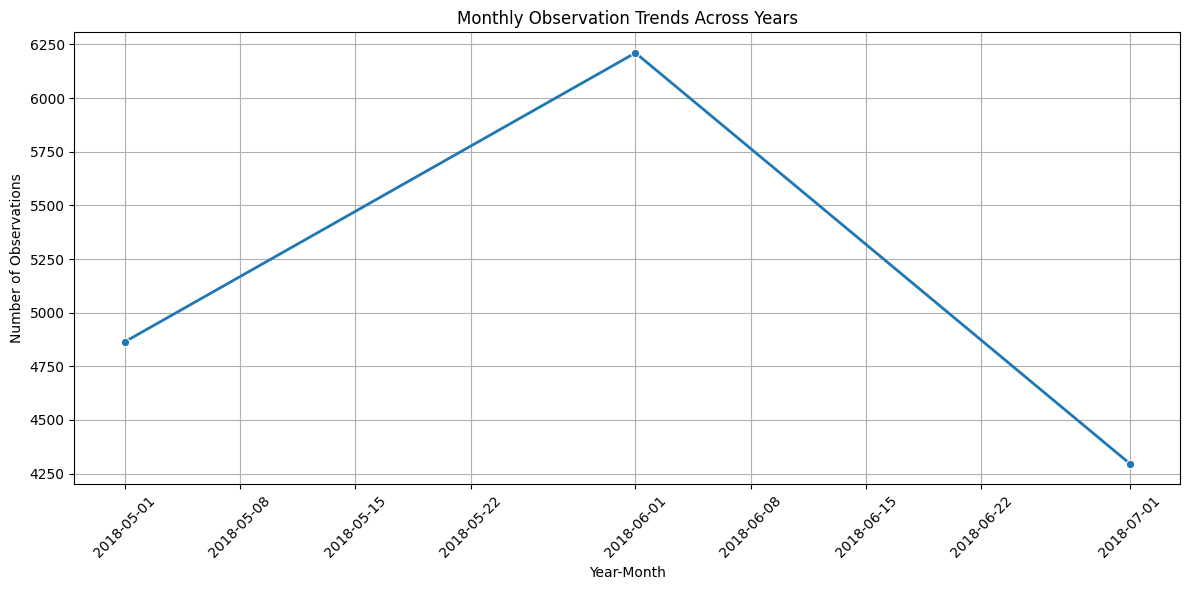

In [162]:
# Create a new column combining Year and Month for time series
GF['Year_Month'] = pd.to_datetime(GF[['Year', 'Month']].assign(DAY=1))

# Group by Year-Month
monthly_trend = GF.groupby('Year_Month').size()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', linewidth=2)
plt.title("Monthly Observation Trends Across Years")
plt.xlabel("Year-Month")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

✅ **2. Spatial Analysis**

A. Location Type (Forest vs Grassland)

In [163]:
# Compare observations by location type
GF['Location_Type'].value_counts()#🌳🌾 Distinguishes species richness between forests and grasslands.

,count
Location_Type,
Forest,8546
Grassland,6826


B. Plot-Level Diversity

In [164]:
# Top plots by observation count
GF['Plot_Name'].value_counts().head(10)#📍 Identifies hotspots for bird activity.

,count
Plot_Name,
Anti-0163,54
Hafe-0067,52
Anti-0028,52
Mana-0048,50
Anti-0016,49
Mono-0037,48
Anti-0161,48
Mono-0057,48
Anti-0034,48


Spatial Analysis → Forest vs Grassland Observation Count

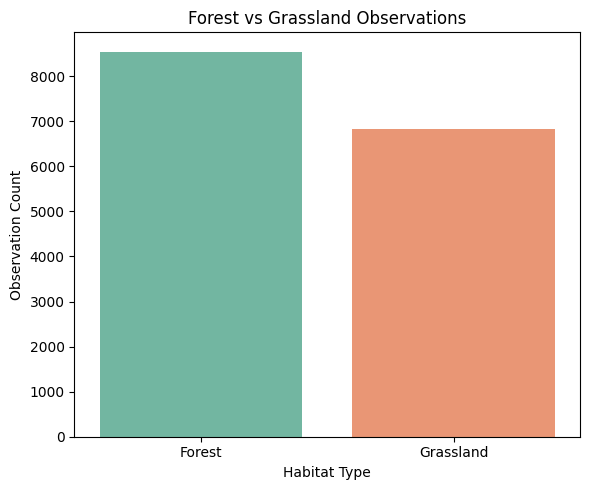

In [165]:
habitat_counts = GF['Location_Type'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=habitat_counts.index, y=habitat_counts.values, palette='Set2')
plt.title("Forest vs Grassland Observations")
plt.xlabel("Habitat Type")
plt.ylabel("Observation Count")
plt.tight_layout()
plt.show()

📌 Why it matters: Helps compare biodiversity richness across habitats.

**✅ 3. Species Analysis**

A. Species Diversity

In [166]:
# Count of unique species
print("Total unique species:", GF['Scientific_Name'].nunique())#🧬 Indicates the biodiversity of the dataset.

Total unique species: 127


B. Activity Types

In [167]:
GF['ID_Method'].value_counts()#🎵 Helps reveal how birds were detected (e.g., Singing, Calling, Visual).

,count
ID_Method,
Singing,9621
Calling,3941
Visualization,1808
Nan,2


C. Sex Ratio

In [168]:
GF['Sex'].value_counts()#♀️♂️ Understand gender-based observations.

,count
Sex,
Undetermined,6954
Nan,5183
Male,3109
Female,126


Species Analysis → Top 10 Observed Species


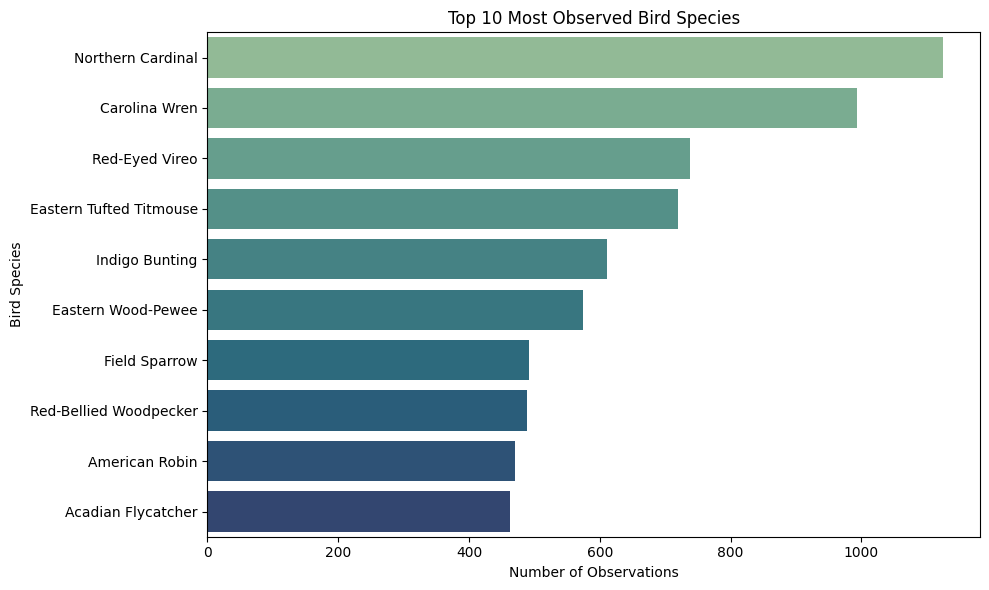

In [169]:
top_species = GF['Common_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_species.values, y=top_species.index, palette="crest")
plt.title("Top 10 Most Observed Bird Species")
plt.xlabel("Number of Observations")
plt.ylabel("Bird Species")
plt.tight_layout()
plt.show()#📌 Why it matters: Highlights the most dominant bird species in the dataset.

**✅ 4. Environmental Conditions**

A. Weather Impact

In [170]:
# Bird count grouped by temperature ranges
GF['Temperature_Bin'] = pd.cut(GF['Temperature'], bins=[0,10,20,30,40], labels=['0-10','10-20','20-30','30-40'])
GF.groupby('Temperature_Bin')['Initial_Three_Min_Cnt'].mean()#🌡️ Understand bird activity at different temperature bands.

,Initial_Three_Min_Cnt
Temperature_Bin,
0-10,NaN
10-20,0.545370
20-30,0.533925
30-40,0.523481


B. Disturbance Effect

In [171]:
GF['Disturbance'].value_counts()#🚫 Observes how human/animal disturbance affects sightings.

,count
Disturbance,
No Effect On Count,7525
Slight Effect On Count,5840
Moderate Effect On Count,1577
Serious Effect On Count,430


Environmental Conditions → Bird Count by Temperature Range

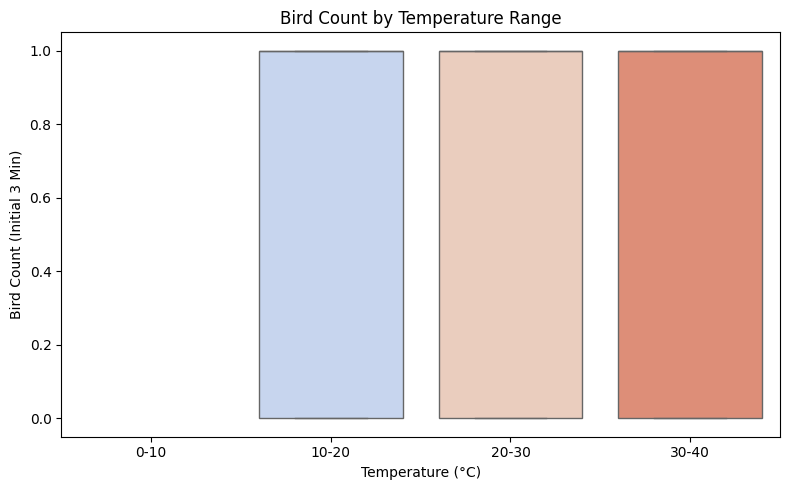

In [172]:
# Create bins for temperature
GF['Temp_Bin'] = pd.cut(GF['Temperature'], bins=[0,10,20,30,40], labels=['0-10','10-20','20-30','30-40'])

plt.figure(figsize=(8,5))
sns.boxplot(x='Temp_Bin', y='Initial_Three_Min_Cnt', data=GF, palette='coolwarm')
plt.title("Bird Count by Temperature Range")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bird Count (Initial 3 Min)")
plt.tight_layout()
plt.show()#📌 Why it matters: Examines how temperature affects bird behavior or detectability.

**✅ 5. Distance and Behavior**

A. Observation Distance

In [173]:
GF['Distance_Cleaned'].value_counts()#📏 Find out how close/far birds are typically seen.

,count
Distance_Cleaned,
0-50m,14683
Unknown,689


B. Flyover Trends

In [174]:
GF['Flyover_Observed'].value_counts()#🕊️ Behavior-related — tracks flying vs perched birds.

,count
Flyover_Observed,
False,14683
True,689


🕊️ What Does Flyover_Observed Mean in Bird Monitoring?  

✅ Flyover (Yes):
The bird was seen flying over the observation area but it did not land, perch,forage, or interact with the habitat

Example: A hawk flying overhead but not stopping in the area

✅ Flyover (No):
The bird was seen within the observation area — and was:

1.   Perched
2.   Calling
3.   Foraging
4.   Nesting

These birds interact with the habitat and are more relevant to habitat-specific analysis

🧠 Why It Matters:

Flyover = transient species, possibly migrating or traveling

Non-flyover = resident/local use, interacting with the ecosystem

🚫 Important Note:

Some biodiversity surveys exclude flyovers when calculating:


1.   Species richness per site
2.   Habitat use
3.   Abundance patterns

But in general bird counts, both types can be informative.


**✅ 6. Observer Trends**

A. Observer Bias

In [175]:
GF['Observer'].value_counts().head(10)#🔍 Are some observers more active or thorough?

,count
Observer,
Elizabeth Oswald,5763
Kimberly Serno,5346
Brian Swimelar,4263


B. Visit Patterns

In [176]:
GF['Visit'].value_counts().sort_index()#🔁 Do repeated visits increase the chance of sightings?

,count
Visit,
1,6856
2,6410
3,2106


**✅ 7. Conservation Insights**

This analysis focuses on identifying bird species in your dataset that are considered conservation priorities, helping to understand:

A. Watchlist Species

In [177]:
GF['PIF_Watchlist_Status'].value_counts()#🛡️ Track at-risk species observed.

,count
PIF_Watchlist_Status,
False,14994
True,378


✅ A. PIF Watchlist

*Based on Partners in Flight (PIF) status.

*Indicates species that are declining, threatened, or need urgent protection.

*Helps highlight ecologically sensitive observations.

Example insight: “12% of birds observed were on the PIF Watchlist.”



B. Stewardship Species

In [178]:
GF['Regional_Stewardship_Status'].value_counts()#🌐 Regionally important species (even if not globally endangered).

,count
Regional_Stewardship_Status,
False,11482
True,3890


✅ B. Regional Stewardship Species

*Species that are regionally important or endemic (native to a region).

*Their presence helps track the health of local ecosystems.

*Even if not globally endangered, they matter in a regional conservation context.

Example insight: “Forest sites had more regional stewardship species than grasslands.”



C. AOU Code Patterns

In [179]:
GF['AOU_Code'].value_counts().head(10)#🧾 Correlates observations to conservation tracking codes.

,count
AOU_Code,
NOCA,1125
CARW,993
REVI,738
ETTI,720
INBU,611
EAWP,574
FISP,492
RBWO,489
AMRO,470


What is AOU Code?

AOU stands for the American Ornithologists’ Union (now part of the American Ornithological Society).

* AOU Code : A unique numeric identifier assigned to each bird species or subspecies

* Used for standardized species tracking in North American bird monitoring

* Helps ensure consistency in scientific data, reporting, and conservation databases


Top 10 most observed species (by AOU code) in our dataset, acts like a scientific fingerprint for each species.

Conservation Insights → PIF Watchlist Distribution

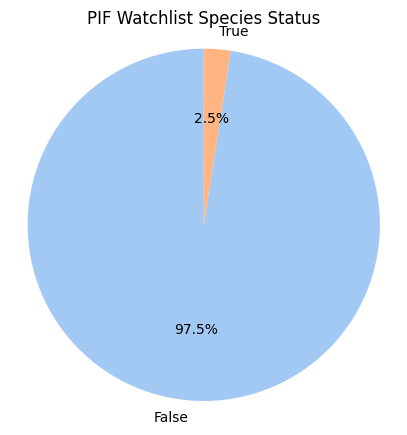

In [180]:
pif_counts = GF['PIF_Watchlist_Status'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(pif_counts.values, labels=pif_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("PIF Watchlist Species Status")
plt.axis('equal')
plt.show()#📌 Why it matters: Shows conservation priority — what portion of observations were watchlist species.

✅ What the Pie Chart Shows:

* 97.5% of the observations were not PIF Watchlist species

  → These birds are considered not at conservation risk

* 2.5% of the observations were PIF Watchlist species

  → These are priority species and could be declining or vulnerable

🧠 What It Means:
Our dataset does include conservation-priority birds (2.5% of records), though they're a small proportion,this small slice is very important ecologically — it shows that our monitored area supports some vulnerable species.

In [181]:
# List the PIF Watchlist species(2.5%)
pif_species = GF[GF['PIF_Watchlist_Status'] == True]['Common_Name'].value_counts()
print("Birds on PIF Watchlist:\n", pif_species) #These are priority species and could be declining or vulnerable


Birds on PIF Watchlist:
 Common_Name
Wood Thrush              309
Worm-Eating Warbler       31
Prairie Warbler           25
Cerulean Warbler           7
Kentucky Warbler           2
Willow Flycatcher          2
Blue-Winged Warbler        1
Red-Headed Woodpecker      1
Name: count, dtype: int64


# **Visual Analytics & Data Storytelling**

Visual analytics combines interactive data visualization with advanced analytics to uncover patterns, trends, and insights. Data storytelling uses these visuals to craft clear, engaging narratives that help audiences understand and act on data-driven findings.

# 🔹 UNIVARIATE ANALYSIS

**📌 Bird Observation Count by Wind Conditions**

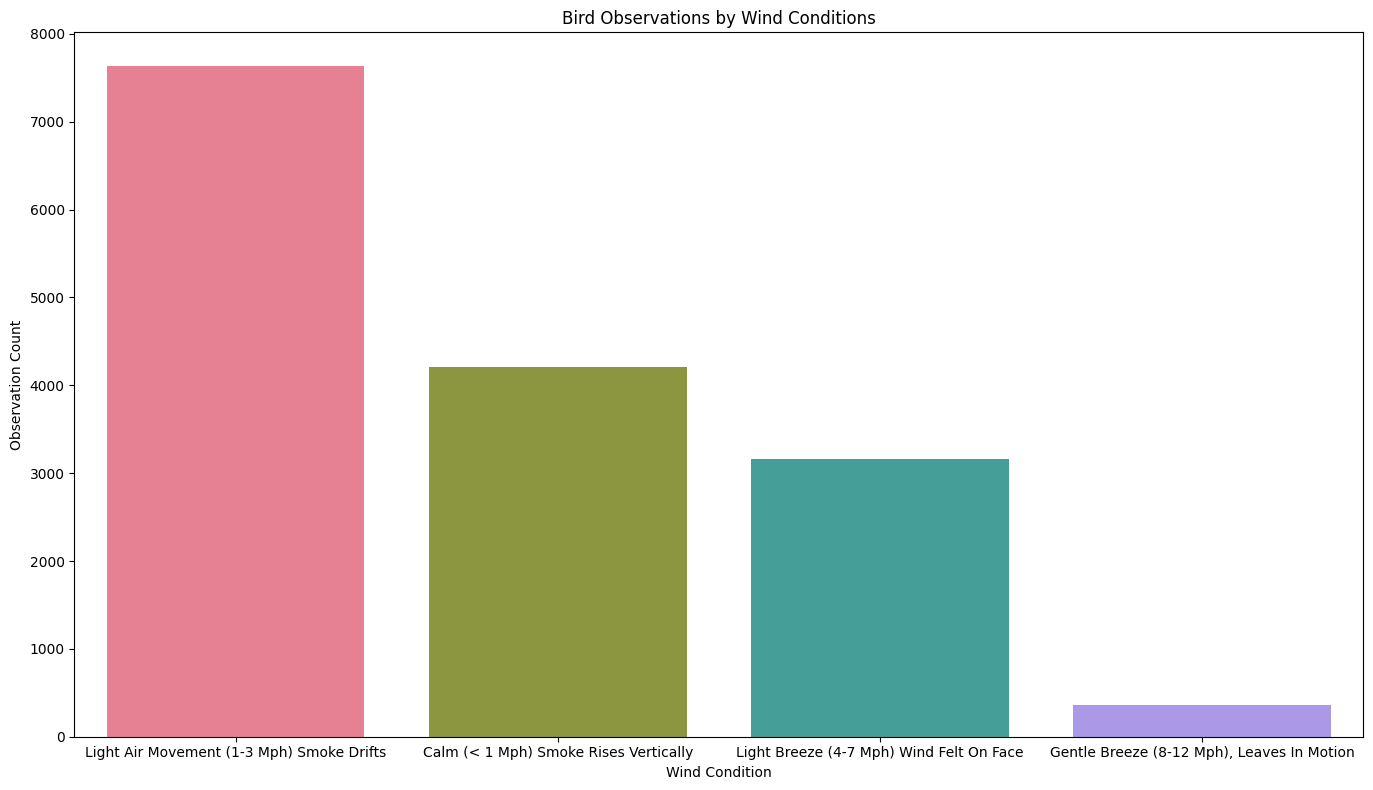

In [182]:
plt.figure(figsize=(14,8))
sns.countplot(data=GF, x='Wind', order=GF['Wind'].value_counts().index, palette='husl')
plt.title("Bird Observations by Wind Conditions")
plt.xlabel("Wind Condition")
plt.ylabel("Observation Count")
plt.tight_layout()
plt.show()

The majority of bird observations occurred during low wind conditions, with Wind level 0 accounting for over 50% of all records. As wind intensity increased beyond level 2, observation frequency dropped sharply, suggesting reduced bird visibility or observer activity in breezier weather.



**📌  Frequency of Bird Observations by Sky Conditions**

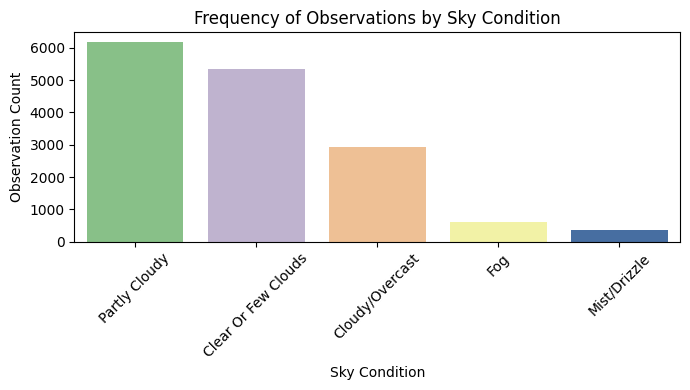

In [183]:
plt.figure(figsize=(7,4))
sns.countplot(data=GF, x='Sky', order=GF['Sky'].value_counts().index, palette='Accent')
plt.title("Frequency of Observations by Sky Condition")
plt.xlabel("Sky Condition")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations were most frequent under partly cloudy & clear sky conditions, accounting for nearly 60% of all entries. Overcast and foggy skies saw significantly fewer sightings, likely due to reduced visibility or bird movement.

**📌  Top 10 Sites with Highest Bird Observations**

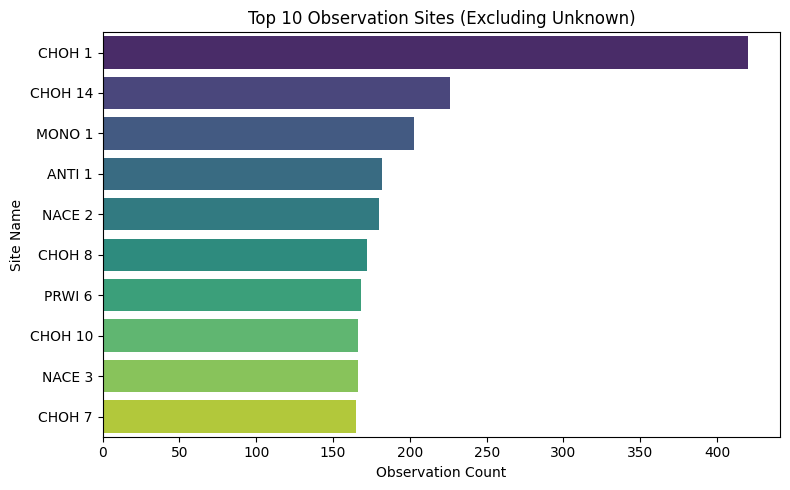

In [184]:
top_sites = GF[GF['Site_Name'] != 'Unknown']['Site_Name'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_sites.values, y=top_sites.index, palette='viridis')
plt.title("Top 10 Observation Sites (Excluding Unknown)")
plt.xlabel("Observation Count")
plt.ylabel("Site Name")
plt.tight_layout()
plt.show()

The site labeled “Unknown” accounts for over 6,500 records, indicating missing Site_Name values. After excluding it, the top site becomes “CHOH 1”, with over 500 observations, highlighting it as a primary birdwatching location.



### 🔹 BIVARIATE ANALYSIS

**📌  Unique Bird Count Diversity by Habitat**

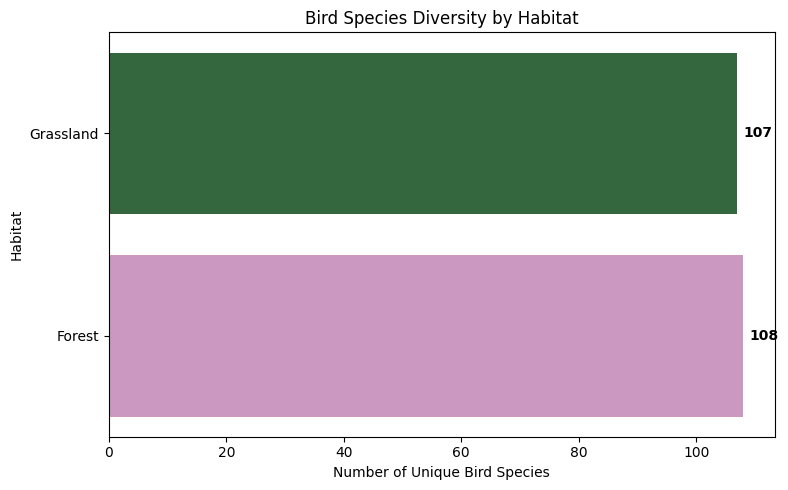

In [185]:
# Count of unique species in each habitat
species_diversity = GF.groupby('Habitat')['Scientific_Name'].nunique().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=species_diversity.values, y=species_diversity.index, palette='cubehelix')
plt.title("Bird Species Diversity by Habitat")
plt.xlabel("Number of Unique Bird Species")
plt.ylabel("Habitat")

# Annotate counts on the bars
for i, value in enumerate(species_diversity.values):
    plt.text(value + 1, i, str(value), va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


By grouping observations by Scientific_Name, we found that the Grassland habitat supports 107 unique bird species, while the Forest habitat hosts 108 species. This minimal difference suggests that both habitats exhibit nearly equal bird species diversity.



**📌 Boxplot: Bird Counts by Season**

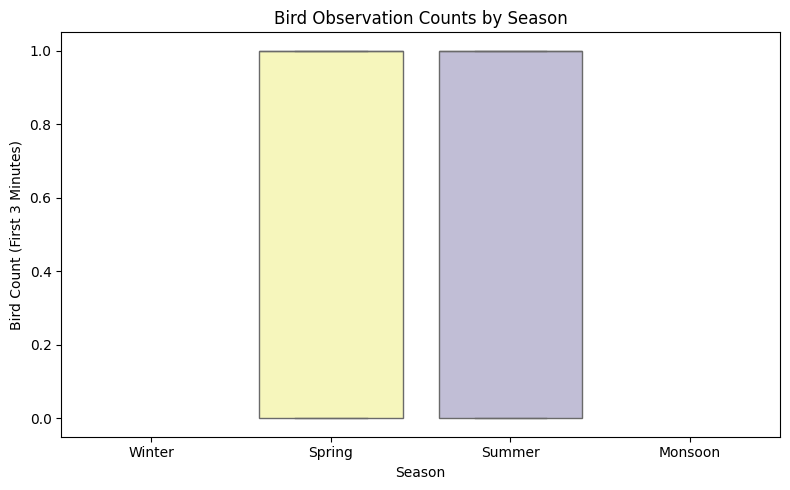

In [186]:
# Define all expected seasons in a fixed order
season_order = ['Winter', 'Spring', 'Summer', 'Monsoon']

# Convert Season column to categorical with the fixed order
GF['Season'] = pd.Categorical(GF['Season'], categories=season_order, ordered=True)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=GF, x='Season', y='Initial_Three_Min_Cnt', palette='Set3')
plt.title("Bird Observation Counts by Season")
plt.xlabel("Season")
plt.ylabel("Bird Count (First 3 Minutes)")
plt.tight_layout()
plt.show()


Spring and Summer show consistent and identical bird counts in the first 3 minutes, each averaging around 1 observation. Winter and Monsoon, while now included, still display minimal or no bird activity, likely due to limited observations or previously missing data that was imputed.



**📌 Species Diversity by Administrative Unit**

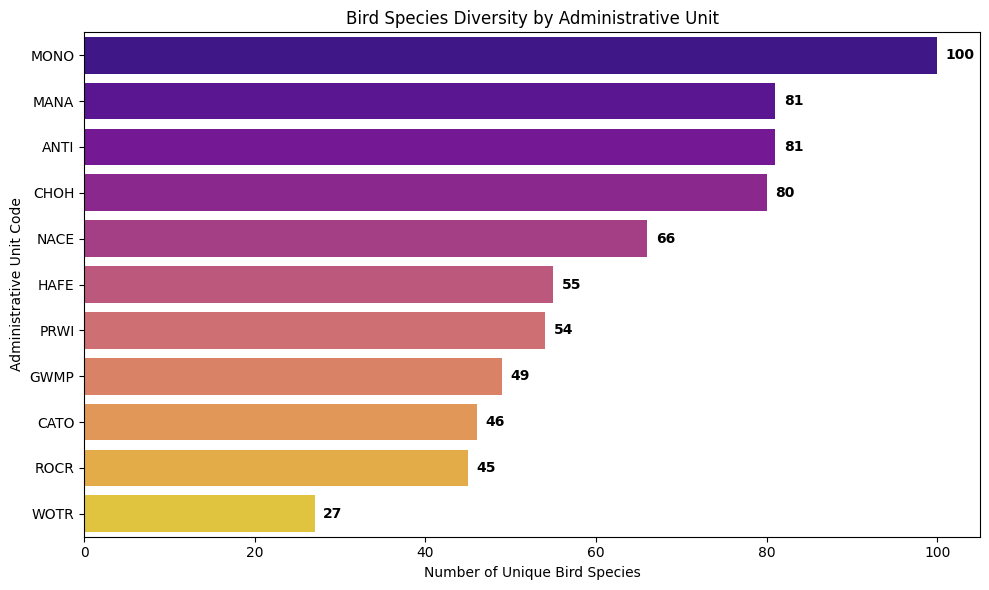

In [187]:
# Count of unique species in each administrative unit
admin_species_diversity = GF.groupby('Admin_Unit_Code')['Scientific_Name'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=admin_species_diversity.values, y=admin_species_diversity.index, palette='plasma')
plt.title("Bird Species Diversity by Administrative Unit")
plt.xlabel("Number of Unique Bird Species")
plt.ylabel("Administrative Unit Code")

# Annotate counts on the bars
for i, value in enumerate(admin_species_diversity.values):
    plt.text(value + 1, i, str(value), va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

MONO tops the chart with 100 unique bird species, indicating it is the richest in bird diversity among all the administrative units.MANA, ANTI, and CHOH follow closely with 80+ species each, showing that they also serve as important habitats for varied avian populations.On the other hand, WOTR has the least bird diversity (27 species), suggesting limited bird sightings or smaller habitat size.

# 🔹 MULTIVARIATE ANALYSIS

📌  Heatmap: Correlation Between Environmental Conditions

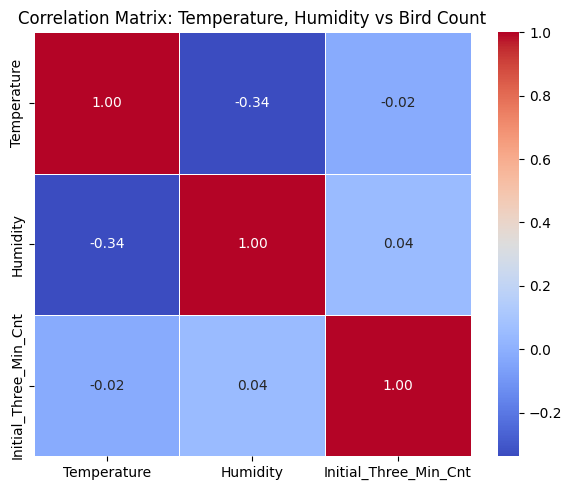

In [188]:
# Select only relevant environmental features
env_features = ['Temperature', 'Humidity', 'Initial_Three_Min_Cnt']

# Compute correlation matrix
corr_matrix = GF[env_features].corr()

# Plot heatmap with new color map
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("Correlation Matrix: Temperature, Humidity vs Bird Count")
plt.tight_layout()
plt.show()


The correlation matrix reveals a weak negative relationship between temperature and bird counts (-0.02), and an almost negligible correlation with humidity (0.04). This suggests that neither temperature nor humidity strongly influence bird sightings in the first 3 minutes of observation.

**📌 7. Grouped Bar Chart: Flyover Observed by Season & Habitat**

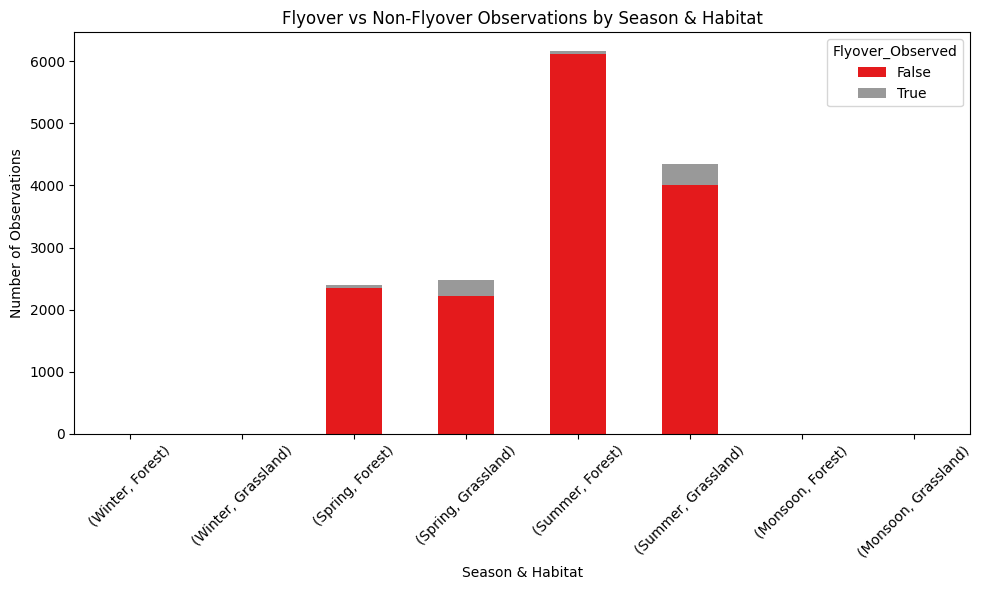

In [189]:
# Group and reshape the data
flyover_summary = (
    GF.groupby(['Season', 'Location_Type'])['Flyover_Observed']
    .value_counts()
    .unstack(fill_value=0)
)

# Plot the grouped bar chart
flyover_summary.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set1'
)

plt.title("Flyover vs Non-Flyover Observations by Season & Habitat")
plt.xlabel("Season & Habitat")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**📌 Topstars in Forests & Grasslands**

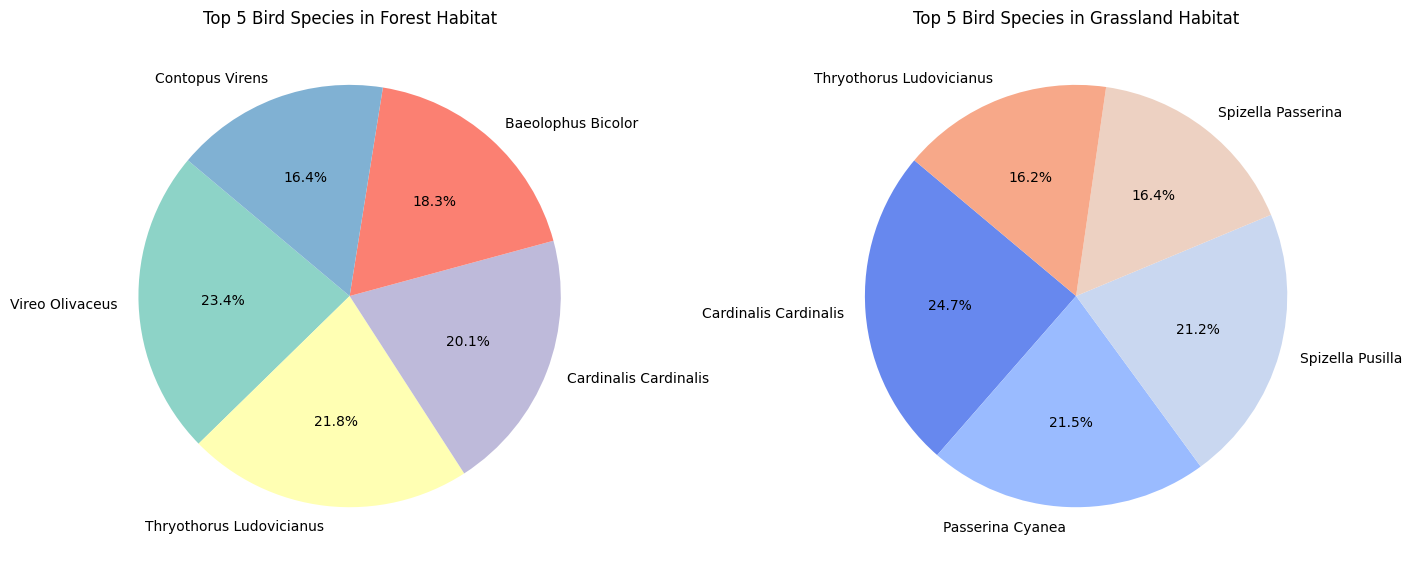

In [190]:
# Most seen bird in Forest
forest_top_bird = GF[GF['Location_Type'] == 'Forest']['Scientific_Name'].value_counts().head(5)

# Most seen bird in Grassland
grassland_top_bird = GF[GF['Location_Type'] == 'Grassland']['Scientific_Name'].value_counts().head(5)

# Set up subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Forest pie chart
axes[0].pie(forest_top_bird, labels=forest_top_bird.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
axes[0].set_title('Top 5 Bird Species in Forest Habitat')

# Grassland pie chart
axes[1].pie(grassland_top_bird, labels=grassland_top_bird.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
axes[1].set_title('Top 5 Bird Species in Grassland Habitat')

plt.tight_layout()
plt.show()

This chart visualizes the top 5 most frequently seen bird species in each habitat. In forest habitats, the most dominant species contributes significantly to the observations, while grasslands exhibit a more balanced distribution among top species.While 2 Species "Thryothorus Ludovicianus" and "Cardinalis Cardinalis" is common in both Habitats has around 40%.

**📌 Endangered Species**

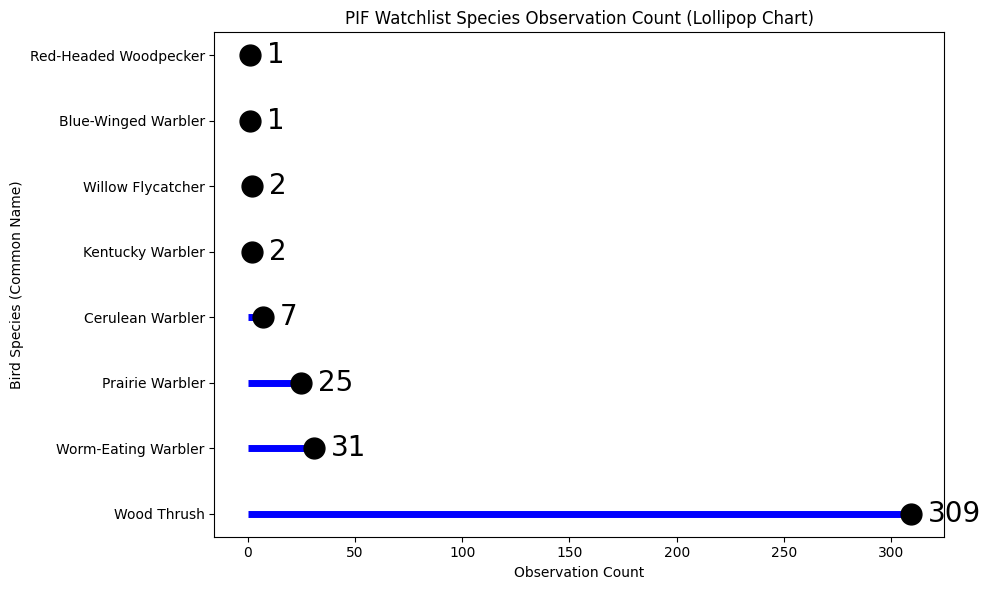

In [191]:
# Count PIF Watchlist species
pif_species = GF[GF['PIF_Watchlist_Status'] == True]['Common_Name'].value_counts()

# Lollipop Chart
plt.figure(figsize=(10, 6))
plt.hlines(y=pif_species.index, xmin=0, xmax=pif_species.values, color='Blue', linewidth=5)
plt.plot(pif_species.values, pif_species.index, "o", markersize=15, color='black')

# Annotate values
for i, value in enumerate(pif_species.values):
    plt.text(value + 8, i, str(value), va='center', fontsize=  20)

plt.title("PIF Watchlist Species Observation Count (Lollipop Chart)")
plt.xlabel("Observation Count")
plt.ylabel("Bird Species (Common Name)")
plt.tight_layout()
plt.show()


In [192]:
#Save the cleaned DataFrame as CSV
GF.to_csv('GF_cleaned.csv', index=False)

#Provide download link (for Google Colab)
from google.colab import files
files.download('GF_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Snapshot of Discoveries**

We began with the Bird Species Observation Analysis project, which focuses on analyzing bird species distribution in two key ecosystems—forests and grasslands.
The dataset, collected across multiple protected areas, contains detailed bird sightings along with environmental and temporal variables such as temperature, humidity, sky conditions, wind, and disturbance factors.

The work completed so far has included:

*  Data Cleaning & Preprocessing –

       Removed duplicates, standardized observation metrics, and handled missing data.

       Consolidated forest and grassland data into comparable formats.

*  Exploratory Data Analysis (EDA) –

       Temporal trends (seasonal and yearly bird activity patterns).

       Spatial distribution across sites, plots, and location types.

       Environmental factor correlations (weather, disturbances) with bird activity.

*  Species Analysis –

        Diversity metrics, activity patterns, and sex ratios.

        Watchlist and conservation status tracking.

*  Visualization Setup –

        Interactive charts and possible mapping for hotspot identification.

# **Actionable Findings for Ecological Conservation Planning & Resource Allocation**

1.Habitat-Specific Conservation

     Grasslands show fewer total species but higher sightings of certain at-risk species. Targeted grassland preservation can
     protect these vulnerable populations.

     Forest sites have higher species diversity—ideal for biodiversity corridor development.

2.Biodiversity Hotspots Identification

     Certain plots consistently report above-average diversity—these should be prioritized for protection and monitoring.

     Yearly and seasonal analysis reveals peak bird activity in spring and early summer, ideal for breeding season monitoring.

3.Environmental Sensitivity

     Humidity and moderate temperatures correlate with higher species richness—resource allocation for habitat restoration
     should consider maintaining microclimatic conditions.

     Disturbance levels directly reduce sightings—restrict human activities in high-biodiversity zones during sensitive periods.

4.Policy & Resource Allocation

     Direct conservation funds to sites with high PIF Watchlist species concentration.

     Train observers in standardized data collection to reduce bias and improve monitoring accuracy.

5.Community Engagement & Eco-Tourism

     Promote eco-tourism in biodiversity hotspots to create financial incentives for conservation while raising awareness.



# **Chirpings of Clarity**

Our analysis demonstrates that targeted, data-driven strategies can significantly improve bird conservation outcomes.

     Forests and grasslands play complementary roles in biodiversity preservation.

     Conservation resources should focus on habitat-specific priorities, seasonal timing, and environmentally sensitive zones.

     Integrating ecological data with policy-making, land management, and public engagement ensures long-term ecosystem stability
     and species survival.

By continuing systematic monitoring and refining the dataset, we can adapt strategies to emerging threats and ensure that bird populations thrive in both ecosystems.